In [1]:
%matplotlib nbagg
from openpyxl import load_workbook 
import matplotlib.pyplot as plt
import os

#Lista de los archivos contenidos en la carpeta Vigilancia_Rutinaria
Archivos=sorted(os.listdir('Vigilancia_Rutinaria'))

#Función que permite leer los archivos xlsx contenidos en Vigilancia_Rutinaria
Leer=lambda archivo:load_workbook(filename = 'Vigilancia_Rutinaria/'+archivo,read_only=True)

#Lista con los libros xlsx leidos:
Libros=map(Leer,Archivos)

/usr/local/lib/python2.7/dist-packages/openpyxl/workbook/names/named_range.py:121: UserWarning: Discarded range with reserved name
  warnings.warn("Discarded range with reserved name")


In [2]:
for i in Archivos:
    print i

Vigilancia rutinaria por eventos Departamental 2009.xlsx
Vigilancia rutinaria por eventos Departamental 2010.xlsx
Vigilancia rutinaria por eventos Departamental 2011.xlsx
Vigilancia rutinaria por eventos Departamental 2012.xlsx
Vigilancia rutinaria por eventos Departamental 2013.xlsx
Vigilancia rutinaria por eventos Departamental 2014.xlsx
Vigilancia rutinaria por eventos Departamental 2015.xlsx


<IPython.core.display.Javascript object>


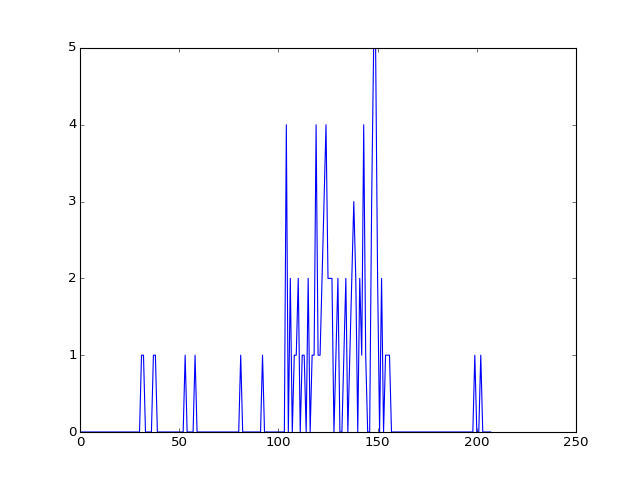

In [3]:
Datos=[]

#Datos de accidente ofidico desde 2009 hasta 2013 para Bogotá
for libro in Libros[:4]:
    for row in libro['Vigilancia envento Dep']['E33:BD33']:
        for cell in row:
            Datos.append(cell.value) 

plt.figure()        
plt.plot(range(len(Datos)),Datos);

In [4]:
%reload_ext version_information
%version_information openpyxl, Os, matplotlib

Software versions
Python 2.7.9 64bit [GCC 4.9.2]
IPython 3.2.0
OS Linux 3.16.0 4 amd64 x86_64 with debian 8.1
openpyxl 2.2.5
Os Os
matplotlib 1.4.3
Wed Jul 15 20:16:47 2015 COT